- and or not を単層で作れるか見てみる。
- フルコネクトでxorを小さく、大きく作ってみる
- Q関数の表をニューラルネットで置き換えてみる(欲しい値との二乗誤差を伝播する)
- 最後までDQNは計算終わらず

In [2]:
import numpy as np
from numpy.random import rand
from numpy.random import randn
import copy
from matplotlib import pyplot as plt
%matplotlib inline

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Perceptron:
    def __init__(self, in_size, _lambda=1.0):
        self._in_size = in_size
        self._weight = randn(in_size, 1)
        self._lambda = _lambda
        self._last_X = np.zeros(in_size)
        
    def forward(self, X):
        self._last_X = X
        return sigmoid(np.dot(X, self._weight))
    
    # forwardで保持しておいた入力を用いて伝搬された値を掛けて学習
    def backward(self, pt, learning_rate=1e-5):
        X = self._last_X
        self._weight -= pt * np.dot(X.T, sigmoid(np.dot(X, self._weight)) * (
            1 - sigmoid(np.dot(X, self._weight)))) * learning_rate
        
    def forward_over_partial_X(self):
        X = self._last_X
        return np.dot(sigmoid(np.dot(X, self._weight)) * (
            1 - sigmoid(np.dot(X, self._weight))), self._weight.T) 

    # o_starではなく、スカラにしてデバッグ
    def loss_function(self, o_star, X):
        return np.sum((self.forward(X) - o_star) ** 2) + \
            self._lambda * np.sum(self._weight ** 2)

    def nabla_w(self, o_star, X):
        return np.dot(X.T, (2 * (sigmoid(np.dot(X, self._weight)) - o_star)) * sigmoid(
            np.dot(X, self._weight)) * (1 - sigmoid(np.dot(X, self._weight)))) + self._lambda * 2 * self._weight
    
    # 勾配確認用
    def numerical_nabla_w(self, o_star, X):
        eps = 1e-4
        nabla_w = np.zeros_like(self._weight)
        for i in range(self._in_size):
            tmp = self._weight[i]
            self._weight[i] = float(tmp) - eps
            lm = self.loss_function(o_star, X)
            self._weight[i] = float(tmp) + eps
            lp = self.loss_function(o_star, X)
            nabla_w[i] = (lp - lm) / 2 * eps
            self._weight[i] = tmp
        return nabla_w
    
    def nabla_i(self, o_star, X):
        return np.dot(2 * (sigmoid(np.dot(X, self._weight)) - o_star) * sigmoid(np.dot(X, self._weight)) * \
                    (1 - sigmoid(np.dot(X, self._weight))), self._weight.T)
        
    def learn(self, o_star, X, learning_rate=1e-5):
        self._weight -= self.nabla_w(o_star, X) * learning_rate
        # 数値計算版
        # self._weight -= self.numerical_nabla_w(o_star, X) * learning_rate

In [ ]:
# And
X = rand(300, 2)
test_X = rand(100, 2)
def And(X):
    _X = copy.deepcopy(X.T)
    _X[0] = X.T[0] > 0.5
    _X[1] = X.T[1] > 0.5
    return np.logical_and(_X[0], _X[1]).astype(float).T.reshape(_X.shape[1], 1)
O = And(X)
test_O = And(test_X)

def train(perceptron, X, O, learning_count=10000):
    learning_step = 0
    loss = np.empty(learning_count)
    while learning_count > learning_step:
        loss[learning_step] = perceptron.loss_function(test_O, test_X)
        print(perceptron.loss_function(O, X)) if learning_step % 1000 == 0 else None
        print("勾配確認：", np.sum(perceptron.nabla_w(
            O, X) - perceptron.numerical_nabla_w(O, X))) if learning_step % 1000 == 0 else None
        perceptron.learn(O, X)
        learning_step += 1
    plt.plot(loss, label="lambda="+str(perceptron._lambda))
    plt.legend()
    
for _lambda in [0, 0.1, 3, 15, 30, 100]:
    and_p = Perceptron(2)
    and_p._lambda = _lambda
    train(and_p, X, O)

239.8905182599293
勾配確認： -127.2028972081921
185.4503484070062
勾配確認： -72.32277259508402
164.81571068663314
勾配確認： -42.91565923065073
155.7774142895587
勾配確認： -26.818009546124287
151.2079135688666
勾配確認： -17.299351292361454
148.58946475208333
勾配確認： -11.29325374604146
146.91449335040835
勾配確認： -7.317514678051115
145.73617387335952
勾配確認： -4.596562092559162
144.8399110483894
勾配確認： -2.6940049356504527
144.1160863028269
勾配確認： -1.3483916607181277
144.15039185147236
勾配確認： 0.2235472745446554
143.5818179294551
勾配確認： 0.7784530874931264
143.07636961777777
勾配確認： 1.1491337216669661
142.62398806836654
勾配確認： 1.3833756279838783
142.2178756700837
勾配確認： 1.5165644172296333
141.85305460692015
勾配確認： 1.5753596810949837
141.5255721744143
勾配確認： 1.5800773984516145
141.23206643692563
勾配確認： 1.5462922142430027
140.96953460274466
勾配確認： 1.4859561859768164
140.73521500327388
勾配確認： 1.4082092231979986
154.65577988604764
勾配確認： 18.47225097806541
152.7150642918977
勾配確認： 13.516316402192537
151.48230303688334
勾配確認： 9.643656947470

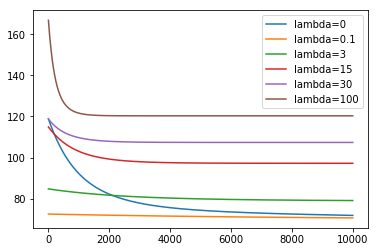

In [8]:
# Or
X = rand(1000, 2)
test_X = rand(500, 2)
def Or(X):
    _X = copy.deepcopy(X.T)
    _X[0] = X.T[0] > 0.5
    _X[1] = X.T[1] > 0.5
    return np.logical_or(_X[0], _X[1]).astype(float).T.reshape(_X.shape[1], 1)
O = Or(X)
test_O = Or(test_X)
    
and_p = Perceptron(2)
for _lambda in [0, 0.1, 3, 15, 30, 100]:
    and_p._lambda = _lambda
    train(and_p, X, O, learning_count=10000)

248.48555332989432
勾配確認： 59.04209969400497
225.37355338999288
勾配確認： 37.43868144064962
216.29203619254966
勾配確認： 23.464526424339972
212.65000658498144
勾配確認： 15.098585336139982
211.10566823124088
勾配確認： 9.97900204647546
210.4181907345772
勾配確認： 6.7327673023578924
210.10089613736005
勾配確認： 4.610556272642773
209.95063574495586
勾配確認： 3.1906303208740203
209.87817519733608
勾配確認： 2.224396302179268
209.8427838737428
勾配確認： 1.558868096197184
210.0073555392508
勾配確認： 0.8266552684838311
210.00244824984793
勾配確認： 0.581633490831445
210.00001573999398
勾配確認： 0.4098004743454363
209.9988070971949
勾配確認： 0.28901301261067325
209.99820555194933
勾配確認： 0.20396709701497273
209.99790580705488
勾配確認： 0.14401678153187203
209.99775632203261
勾配確認： 0.10172193439816227
209.99768172877813
勾配確認： 0.0718655994010422
209.9976444911254
勾配確認： 0.050781045935487684
209.99762589626823
勾配確認： 0.03588679153119807
215.45684491258348
勾配確認： -7.932466097143182
215.02746879043093
勾配確認： -5.247621530054616
214.8417061846525
勾配確認： -3.42905631598

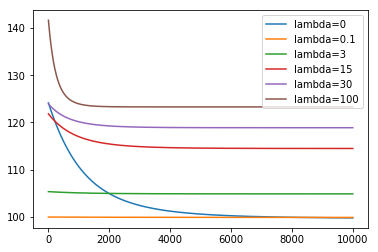

In [13]:
# Not
X = rand(1000, 1)
test_X = rand(500, 1)
def Not(X):
    _X = copy.deepcopy(X.T)
    _X = X.T < 0.5
    return _X.astype(float).T.reshape(_X.shape[1], 1)
O = Not(X)
test_O = Not(test_X)
    
and_p = Perceptron(1)
for _lambda in [0, 0.1, 3, 15, 30, 100]:
    and_p._lambda = _lambda
    train(and_p, X, O, learning_count=10000)

250.95511183601855
勾配確認： -13.367942155239792
250.3955695278798
勾配確認： -6.209088646683217
250.2101095764819
勾配確認： -2.897503543581054
250.11713885659196
勾配確認： -1.3597887038308667
250.05410382131151
勾配確認： -0.6419432041308482
250.0056567459407
勾配確認： -0.3048390552348528
249.96694669029765
勾配確認： -0.1452949266190462
249.9356793881363
勾配確認： -0.06893577268180939
249.91034940970266
勾配確認： -0.03179664961961648
249.88981289677386
勾配確認： -0.013331964233841087
249.87361445717346
勾配確認： -0.012270544731930233
249.86039967068692
勾配確認： -0.0028494087833074166
249.84972492009425
勾配確認： 0.0018713678640175369
249.841101362115
勾配確認： 0.00425413155453469
249.83413444672723
勾配確認： 0.0054339339497985195
249.8285056071698
勾配確認： 0.005968213546109269
249.82395759760442
勾配確認： 0.006139754062804315
249.8202826782688
勾配確認： 0.006098551682038045
249.81731308018556
勾配確認： 0.005928717695899366
249.8149133071712
勾配確認： 0.005680400254827633
249.8685252014966
勾配確認： -0.2395441417152734
249.86723443768935
勾配確認： -0.10691261218340048
249

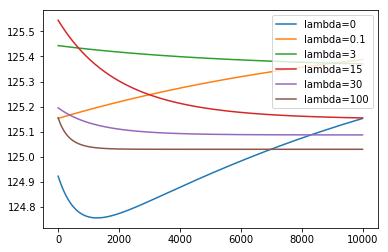

In [15]:
# Xor
X = rand(1000, 2)
test_X = rand(500, 2)
def Xor(X):
    _X = copy.deepcopy(X.T)
    _X[0] = X.T[0] > 0.5
    _X[1] = X.T[1] > 0.5
    return np.logical_xor(_X[0], _X[1]).astype(float).T.reshape(_X.shape[1], 1)
O = Xor(X)
test_O = Xor(test_X)
    
for _lambda in [0, 0.1, 3, 15, 30, 100]:
    and_p = Perceptron(2)
    and_p._lambda = _lambda
    train(and_p, X, O, learning_count=10000)

269.8408359274217
268.10026882675663
266.4775612694761
264.96306907154417
263.5494456201417
262.23140788804164
261.00506432856696
259.86724074742096
258.8150037748843
257.84538111549455


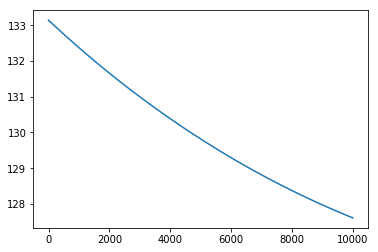

In [48]:
# Xor
# learning_rateを大きくするとすぐに振動する。
# 二重のfor文のためかとても遅い（行列計算でレイヤーごと重みを計算しないので、パーセプトロンごとの直積を取る必要がある）。
# そのため高速化については要検討 -> 直積を取っていた部分を勾配の合計値をとってまとめて伝搬することで入れ子をひとつ外せた。
X = rand(1000, 2)
test_X = rand(500, 2)
def Xor(X):
    _X = copy.deepcopy(X.T)
    _X[0] = X.T[0] > 0.5
    _X[1] = X.T[1] > 0.5
    return np.logical_xor(_X[0], _X[1]).astype(float).T.reshape(_X.shape[1], 1)
O = Xor(X)
test_O = Xor(test_X)

output_perceptron = Perceptron(10)
layer_one = [Perceptron(10, _lambda=0) for i in range(10)]
layer_two = [Perceptron(2, _lambda=0) for i in range(10)]

def network_loss_function(O, X):
    out_one = np.array([p.forward(X).flatten() for p in layer_two])
    out_two = np.array([p.forward(out_one.T).flatten() for p in layer_one])
    out = output_perceptron.forward(out_two.T)
    return np.sum((out - O) ** 2)
    
rate = 1e-9
def train_network(X, O, learning_count=10000):
    learning_step = 0
    loss = np.empty(learning_count)
    while learning_count > learning_step:
        loss[learning_step] = network_loss_function(test_O, test_X)
        print(network_loss_function(O, X)) if learning_step % 1000 == 0 else network_loss_function(O, X)
        output_perceptron.learn(O, output_perceptron._last_X, learning_rate=rate)
        nabla_i = np.sum(output_perceptron.nabla_i(O, output_perceptron._last_X), axis=0).flatten()
        nabla_x = 0
        for pi, p in enumerate(layer_one):
            p.backward(nabla_i[pi], learning_rate=rate)
            nabla_x += np.sum(p.forward_over_partial_X(), axis=0).flatten()
        for p2i, p2 in enumerate(layer_two):
            p2.backward(nabla_x[p2i], learning_rate=rate)
        learning_step += 1
    plt.plot(loss)

train_network(X, O)    

[2018-11-28 03:09:16,189] Making new env: Taxi-v2


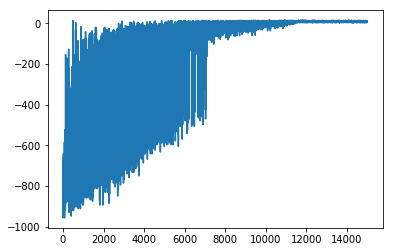

In [37]:
import taxi_driver
import gym, gym.spaces

t = taxi_driver.taxi_driver(env=gym.make('Taxi-v2'), try_count=15000, 
        show_process=False, show_score_and_count=False)
t.learn()
t.show_learning_curve()
t.save_brain()

In [ ]:
import gym, gym.spaces
from copy import deepcopy
from collections import deque
import random

class DQN:
    def __init__(self, env):
        self.env = env
        self.state_size = env.observation_space.n
        self.action_size = env.action_space.n
        self.memory = deque(maxlen=100000)
        self.gamma = 0.9
        self.epsilon = 1.0
        self.e_decay = 0.9999
        self.e_min = 0.01
        self.learning_rate = 1e-4
        self.model = self.build_network()
        # target_modelの意図、目的が理解できず。未実装。
        # 自分を教師にして不安定になることを防ぐ
        self.target_model = deepcopy(self.model)
        
    def build_network(self):
        hidden_p_c_p_l = 2
        output_perceptron = Perceptron(hidden_p_c_p_l)
        layer_one = [Perceptron(hidden_p_c_p_l) for i in range(hidden_p_c_p_l)]
        layer_two = [Perceptron(hidden_p_c_p_l) for i in range(hidden_p_c_p_l)]
        layer_three = [Perceptron(hidden_p_c_p_l) for i in range(hidden_p_c_p_l)]
        layer_four = [Perceptron(self.state_size + self.action_size) for i in range(hidden_p_c_p_l)]
        return [output_perceptron, layer_one, layer_two, layer_three, layer_four]
    
    def predict(self, X):
        out_one = np.array([p.forward(X).flatten() for p in self.model[4]])
        out_two = np.array([p.forward(out_one.T).flatten() for p in self.model[3]])
        out_three = np.array([p.forward(out_two.T).flatten() for p in self.model[2]])
        out_four = np.array([p.forward(out_three.T).flatten() for p in self.model[1]])
        out = self.model[0].forward(out_four.T)
        return out

    def network_loss_function(self, O, X):
        out = self.predict(X)
        return np.sum((out - O) ** 2)
    
    def train_network(self, X, O, learning_count=100):
        rate = 1e-5
        learning_step = 0
        loss = np.empty(learning_count)
        while learning_count > learning_step:
            self.predict(X)
            
            
#             self.model[0].learn(O, self.model[0]._last_X, learning_rate=rate)
#             nabla_i = np.sum(self.model[0].nabla_i(O, self.model[0]._last_X), axis=0).flatten()
#             nabla_x = 0
#             for pi, p in enumerate(self.model[1]):
#                 p.backward(nabla_i[pi], learning_rate=rate)
#                 nabla_x += np.sum(p.forward_over_partial_X(), axis=0).flatten()
#             nabla_x2 = 0
#             for pi, p in enumerate(self.model[2]):
#                 p.backward(nabla_x[pi], learning_rate=rate)
#                 nabla_x2 += np.sum(p.forward_over_partial_X(), axis=0).flatten()
#             nabla_x3 = 0
#             for pi, p in enumerate(self.model[3]):
#                 p.backward(nabla_x2[pi], learning_rate=rate)
#                 nabla_x3 += np.sum(p.forward_over_partial_X(), axis=0).flatten()
#             for pi, p in enumerate(self.model[4]):
#                 p.backward(nabla_x3[pi], learning_rate=rate)
                
            # 汎用的なループに変更
            for li, l in enumerate(self.model):
                if li == 0:
                    l.learn(O, l._last_X, learning_rate=rate)
                    nabla_x = np.sum(l.nabla_i(O, l._last_X), axis=0).flatten()
                    nabla_x_2 = 0
                else:
                    for pi, p in enumerate(l):
                        p.backward(nabla_x[pi], learning_rate=rate)
                        nabla_x_2 += np.sum(p.forward_over_partial_X(), axis=0).flatten()
                    nabla_x = nabla_x_2
                    nabla_x_2 = 0
            
            
            learning_step += 1

    def append_memory(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def choose_action(self, state):
        if self.epsilon >= random.random():
            return self.env.action_space.sample()
        else:
            return self.choose_best_action(state)

    def choose_best_action(self, state):
        best_actions = []
        max_act_value = -100
        for a in range(self.action_size):
            s_a = np.zeros(self.state_size + self.action_size)
            s_a[state] = 1.0
            s_a[self.state_size + a] = 1.0
            act_value = self.predict(s_a)
            if act_value > max_act_value:
                best_actions = [a]
                max_act_value = act_value
            elif act_value == max_act_value:
                best_actions.append(a)
        return random.choice(best_actions)

    def replay_experience(self, batch_size):
        batch_size = min(batch_size, len(self.memory))
        minibatch = random.sample(self.memory, batch_size)
        X = []
        O = []
        for i in range(batch_size):
            state, action, reward, next_state, done = minibatch[i]
            s_a = np.zeros(self.state_size + self.action_size)
            s_a[state] = 1.0
            s_a[action] = 1.0
            if done:
                target_f = reward
            else:
                next_rewards = []
                for a in range(self.action_size):
                    next_s_a = np.zeros(self.state_size + self.action_size)
                    next_s_a[next_state] = 1.0
                    next_s_a[self.state_size + a] = 1.0
                    next_rewards.append(self.predict(next_s_a))
                np_n_r_max = np.amax(np.array(next_rewards))
                target_f = reward + self.gamma * np_n_r_max
            X.append(s_a)
            O.append(target_f)
        X = np.array(X)
        O = np.array([O]).T
        self.train_network(X, O)
        if self.epsilon > self.e_min:
            self.epsilon *= self.e_decay

In [138]:
from IPython.display import display
import ipywidgets as widgets
dqn_taxi_driver = DQN(gym.make('Taxi-v2'))
episodes_c = 200
batch_size = 1024
rewards_per_episode = []
fp = widgets.FloatProgress(min=0, max=episodes_c)
display(fp)
for e in range(episodes_c):
    fp.value += 1
    state = dqn_taxi_driver.env.reset()
    done = False
    total_reward = 0
    while not done:
        action = dqn_taxi_driver.choose_action(state)
        pre_state = state
        state, reward, done, info = dqn_taxi_driver.env.step(action)
        total_reward += reward
        dqn_taxi_driver.append_memory(pre_state, action, reward, state, done)
        rewards_per_episode.append(total_reward)
    dqn_taxi_driver.replay_experience(batch_size)
    if e % 10 == 0:
        print(total_reward)
fp.close()
plt.plot(rewards_per_episode)

[2018-11-28 13:13:30,269] Making new env: Taxi-v2


FloatProgress(value=0.0, max=200.0)

-704
-512
-803
-776


KeyboardInterrupt: 

[2018-11-28 14:21:23,269] Making new env: FrozenLake-v0


FloatProgress(value=0.0, max=200.0)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


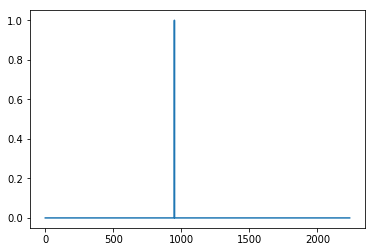

In [4]:
from IPython.display import display
import ipywidgets as widgets
dqn_taxi_driver = DQN(gym.make('FrozenLake-v0'))
episodes_c = 200
batch_size = 32
rewards_per_episode = []
fp = widgets.FloatProgress(min=0, max=episodes_c)
display(fp)
for e in range(episodes_c):
    fp.value += 1
    state = dqn_taxi_driver.env.reset()
    done = False
    total_reward = 0
    while not done:
        action = dqn_taxi_driver.choose_action(state)
        pre_state = state
        state, reward, done, info = dqn_taxi_driver.env.step(action)
        total_reward += reward
        dqn_taxi_driver.append_memory(pre_state, action, reward, state, done)
        rewards_per_episode.append(total_reward)
    for i in range(100):
        dqn_taxi_driver.replay_experience(batch_size)
    if e % 10 == 0:
        print(total_reward)
fp.close()
plt.plot(rewards_per_episode)

In [ ]:
from IPython.display import display
import ipywidgets as widgets
dqn_taxi_driver = DQN(gym.make('FrozenLake-v0'))
episodes_c = 20000
batch_size = 32
rewards_per_episode = []
fp = widgets.FloatProgress(min=0, max=episodes_c)
display(fp)
for e in range(episodes_c):
    fp.value += 1
    state = dqn_taxi_driver.env.reset()
    done = False
    total_reward = 0
    while not done:
        action = dqn_taxi_driver.choose_action(state)
        pre_state = state
        state, reward, done, info = dqn_taxi_driver.env.step(action)
        total_reward += reward
        dqn_taxi_driver.append_memory(pre_state, action, reward, state, done)
        rewards_per_episode.append(total_reward)
    dqn_taxi_driver.replay_experience(batch_size)
    if e % 1000 == 0:
        print(total_reward)
fp.close()
plt.plot(rewards_per_episode)

[2018-11-28 14:46:40,585] Making new env: FrozenLake-v0


FloatProgress(value=0.0, max=20000.0)

0.0
0.0
0.0
0.0
0.0
0.0


- [ ] 8つのパーセプトロンを3層
- [ ] target_network, predectメソッドに引数として持たせるか、使うモデルごとに違う名前を持たせる
- [ ] Xor, 多層パーセプトロンを学んだレポート, pdf2まい、このファイル。メールで。